# Homework_2022_03_07

<font color=ff0000> 截止日期 3.31（周四） 23:59</font>

### Exercise 1 Pandas基础练习(4')

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
data = {
    'age': [24, 53, 23, 24, 33, 42, 57, 57, 36, 29, 53, 39],
    'gender': ['M', 'F', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M', 'F'],
    'occupation': ['technician', 'other', 'writer', 'technician', 'technician', 'executive', 'administrator', 'administrator', 'administrator', 'student', 'lawyer', 'other'],
    'zip_code': ['85711', '94043', '32067', '43537', '15213', '98101', '91344', '91344', '05201', '01002', '90703', '30329']
}

1.1 创建一组从1开始递增的id，作为行索引，由data生成一个DataFrame(1')：

In [3]:
# TODO
df = pd.DataFrame({"age":data["age"],"gender":data["gender"],"occupation":data["occupation"],"zip_code":data["zip_code"]})
df.index += 1
df

,age,gender,occupation,zip_code
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,technician,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,57,M,administrator,91344
9,36,M,administrator,05201
10,29,M,student,01002


1.2 删除DataFrame中重复的行（保留一行），再删除所有occupation为"other"的行(0.5'):

In [4]:
# TODO
df = df.drop_duplicates()
print(df)
df_ = df.drop(df[df["occupation"] == "other"].index)
df_

    age gender     occupation zip_code
1    24      M     technician    85711
2    53      F          other    94043
3    23      M         writer    32067
4    24      M     technician    43537
5    33      F     technician    15213
6    42      M      executive    98101
7    57      M  administrator    91344
9    36      M  administrator    05201
10   29      M        student    01002
11   53      M         lawyer    90703
12   39      F          other    30329


,age,gender,occupation,zip_code
1,24,M,technician,85711
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,technician,15213
6,42,M,executive,98101
7,57,M,administrator,91344
9,36,M,administrator,05201
10,29,M,student,01002
11,53,M,lawyer,90703


1.3 以两种方式访问DataFrame的第一行(0.5')：

In [5]:
# TODO
print(df.loc[1])
print(df.iloc[0])
print(df[0:1])

age                   24
gender                 M
occupation    technician
zip_code           85711
Name: 1, dtype: object
age                   24
gender                 M
occupation    technician
zip_code           85711
Name: 1, dtype: object
   age gender  occupation zip_code
1   24      M  technician    85711


1.4 以两种方式访问DataFrame的"occupation"列(0.5')：

In [6]:
# TODO
print(df["occupation"])
print(df.iloc[:,2])
print(pd.DataFrame(df,columns = ["occupation"]))
print(df.occupation)

1        technician
2             other
3            writer
4        technician
5        technician
6         executive
7     administrator
9     administrator
10          student
11           lawyer
12            other
Name: occupation, dtype: object
1        technician
2             other
3            writer
4        technician
5        technician
6         executive
7     administrator
9     administrator
10          student
11           lawyer
12            other
Name: occupation, dtype: object
       occupation
1      technician
2           other
3          writer
4      technician
5      technician
6       executive
7   administrator
9   administrator
10        student
11         lawyer
12          other
1        technician
2             other
3            writer
4        technician
5        technician
6         executive
7     administrator
9     administrator
10          student
11           lawyer
12            other
Name: occupation, dtype: object


1.5 打印出DataFrame中出现次数最多的职业名称(0.5')：

In [7]:
# TODO
count = df["occupation"].value_counts()
print(count.idxmax())

technician


1.6 将data_2转换成DataFrame，与上一个DataFrame按照"zip_code"这一列合并，按两种合并方式：

1.合并后结果保留两个DataFrame的并集(0.5')；
2.合并后只保留data_2的所有数据(0.5')。

In [8]:
data_2 = {
    'zip_code': ['85711', '94043', '15213', '98101', '30329'],
    'name': ['Alan', 'Alice', 'Abigail', 'Bob', 'Dave']
}
df2 = pd.DataFrame(data_2)

# TODO
##################### Method 1 #######################
df_a = pd.merge(df, df2, on='zip_code', how='outer')
print(df_a)
##################### Method 2 #######################
df_b = pd.merge(df, df2, on='zip_code', how='inner')
print(df_b)

    age gender     occupation zip_code     name
0    24      M     technician    85711     Alan
1    53      F          other    94043    Alice
2    23      M         writer    32067      NaN
3    24      M     technician    43537      NaN
4    33      F     technician    15213  Abigail
5    42      M      executive    98101      Bob
6    57      M  administrator    91344      NaN
7    36      M  administrator    05201      NaN
8    29      M        student    01002      NaN
9    53      M         lawyer    90703      NaN
10   39      F          other    30329     Dave
   age gender  occupation zip_code     name
0   24      M  technician    85711     Alan
1   53      F       other    94043    Alice
2   33      F  technician    15213  Abigail
3   42      M   executive    98101      Bob
4   39      F       other    30329     Dave


### Exercise 2 Pandas数据分析(6')

本部分数据基于2022年3月的COVID-19疫情数据进行数据分析。

在此致谢数据来源：https://github.com/BlankerL/DXY-COVID-19-Data ，并祝愿疫情的影响早日结束。

2.1 读取COVID-19_March.csv，通过shape和info()查看数据基本信息(0.5')。

In [9]:
import pandas as pd
#TODO
df=pd.read_csv('./COVID19_March.csv')
print(df.shape)
print(df.info())

(34021, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34021 entries, 0 to 34020
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   continentName            34021 non-null  object 
 1   continentEnglishName     34021 non-null  object 
 2   countryName              34021 non-null  object 
 3   countryEnglishName       31953 non-null  object 
 4   provinceName             34021 non-null  object 
 5   provinceEnglishName      31953 non-null  object 
 6   province_zipCode         34021 non-null  int64  
 7   province_confirmedCount  34021 non-null  int64  
 8   province_suspectedCount  34021 non-null  int64  
 9   province_curedCount      34021 non-null  int64  
 10  province_deadCount       34021 non-null  int64  
 11  cityName                 16252 non-null  object 
 12  cityEnglishName          15017 non-null  object 
 13  city_zipCode             16252 non-null  float64
 14  city_confi

2.2 从原表格的updateTime中提取最后更新时间，去除具体时间得到日期，并在原DataFrame中增加一列"Date"保存日期(0.5')。

In [10]:
#TODO
print(df["updateTime"].values)
# date = df["updateTime"][:,:-4]
date = np.array(df["updateTime"].values)
for i in range(len(date)):
    date[i] = date[i].split(" ")[0]
df2 = pd.DataFrame({"date":date})
# print(df2)
# print(df)
df.insert(df.shape[1],"Date",date)
# print(df)

['2022/3/27 17:18' '2022/3/27 17:18' '2022/3/27 17:18' ... '2022/3/1 8:50'
 '2022/3/1 8:50' '2022/3/1 8:50']


2.3 这里给出的数据由每天循环爬取得到，因此同一地区同一日的数据可能会有多项纪录，但我们只需保存每一天同一个地区（精确到城市）最后一条记录。请对数据进行筛选，按provinceName, cityName, Date三列为标准去重，并将DataFrame按时间从早到晚的顺序排序(1')。

In [15]:
#TODO
df_new = df.drop_duplicates(subset=['provinceName','cityName','Date'], ignore_index=True)
df_new['updateTime'] = pd.to_datetime(df_new['updateTime'])
# df_new['Date'] = pd.to_datetime(df_new['Date'])
df_sorted = df_new.sort_values("updateTime")
df_sorted

/home/gyr/anaconda3/envs/rlgpu/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,continentName,continentEnglishName,countryName,countryEnglishName,provinceName,provinceEnglishName,province_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,cityName,cityEnglishName,city_zipCode,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime,Date
15399,亚洲,Asia,中国,China,四川省,Sichuan,510000,1462,22,1377,3,阿坝州,Ngawa Tibetan and Qiang Autonomous Prefecture,513200.0,1.0,0.0,1.0,0.0,2022-03-01 08:56:00,2022/3/1
15379,亚洲,Asia,中国,China,四川省,Sichuan,510000,1462,22,1377,3,成都,Chengdu,510100.0,1053.0,0.0,970.0,3.0,2022-03-01 08:56:00,2022/3/1
15380,亚洲,Asia,中国,China,四川省,Sichuan,510000,1462,22,1377,3,凉山州,Liangshan Yi Autonomous Prefecture,513400.0,15.0,1.0,14.0,0.0,2022-03-01 08:56:00,2022/3/1
15381,亚洲,Asia,中国,China,四川省,Sichuan,510000,1462,22,1377,3,眉山,Meishan,511400.0,9.0,0.0,8.0,0.0,2022-03-01 08:56:00,2022/3/1
15382,亚洲,Asia,中国,China,四川省,Sichuan,510000,1462,22,1377,3,甘孜州,Garzê Tibetan Autonomous Prefecture,513300.0,78.0,0.0,78.0,0.0,2022-03-01 08:56:00,2022/3/1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,亚洲,Asia,中国,China,广东省,Guangdong,440000,6536,25,5620,8,潮州,Chaozhou,445100.0,7.0,0.0,7.0,0.0,2022-03-27 17:18:00,2022/3/27
19,亚洲,Asia,中国,China,广东省,Guangdong,440000,6536,25,5620,8,河源,Heyuan,441600.0,7.0,0.0,7.0,0.0,2022-03-27 17:18:00,2022/3/27
20,亚洲,Asia,中国,China,广东省,Guangdong,440000,6536,25,5620,8,云浮,Yunfu,445300.0,7.0,0.0,7.0,0.0,2022-03-27 17:18:00,2022/3/27
11,亚洲,Asia,中国,China,广东省,Guangdong,440000,6536,25,5620,8,韶关,Shaoguan,440200.0,11.0,0.0,9.0,1.0,2022-03-27 17:18:00,2022/3/27


2.4 新建两个DataFrame，分别包含筛选后国内的数据和国外的数据，便于后面分别统计(0.5')。

In [12]:
#TODO
df_c = df_sorted[df_sorted["countryName"] == '中国'].copy(deep='True')
df_f = df_sorted[df_sorted["countryName"] != '中国'].copy(deep='True')
df_c.shape

(10264, 20)

2.5 对于境外的每一个国家，请用记录中最后一天的病例数(province_confirmed)减去第一天的病例数，再除以之间间隔的天数，以此统计日平均新增情况，并打印全球平均日新增的前十名(1')。

提示：可以使用groupby&apply等方法；请注意，记录的第一天与最后一天未必是3.1和3.27。
参考阅读：https://zhuanlan.zhihu.com/p/101284491

In [17]:
#TODO
from natsort import index_natsorted
def f(df):
    sums=df[['province_confirmedCount','Date']].groupby('Date').agg('sum')
    sums=sums.sort_values(by='Date',axis=0,key=lambda x: np.argsort(index_natsorted(sums.index)))
    l=int(sums.index[-1].split('/')[-1])-int(sums.index[0].split('/')[-1])
    ret_val = (sums.iloc[-1]-sums.iloc[0])/l
    return ret_val
# # def fd(x):
# #     df = x.sort_values(by = 'Date',ascending=True)
# #     return df.iloc[-1,:]['Date'] - df.iloc[0,:]['Date']
# group = df_f.groupby("countryName")
# # group1 = df_f.groupby("countryName").agg({"Date":"max"})
# # group2 = df_f.groupby("countryName").agg({"Date":"min"})
# # print(group1,group2)
# group3 = group.apply(f)
# # group4 = group.apply(fd)
# # group5 = group
# group4 = group3.sort_values(ascending=False,)
# group4.iloc[:10]


mean_res = df_f.groupby('countryName').apply(f)
mean_res = mean_res.sort_values(by='province_confirmedCount',
    key=lambda x: np.argsort(index_natsorted(mean_res.province_confirmedCount)),
                ascending=False)
print(mean_res[0:10])



             province_confirmedCount
countryName                         
韩国                     321663.653846
越南                     209240.269231
德国                     181072.500000
法国                      80409.961538
英国                      73145.961538
意大利                     56343.730769
荷兰                      56220.961538
日本                      51193.423077
俄罗斯                     50667.461538
巴西                      39729.807692


2.6 利用pandas的cut功能对境外的日平均新增情况进行分组，打印每个数量级区间内的国家数(0.5')。

In [ ]:
#TODO
mean_res1 = mean_res.copy(deep='True')

# group5 = pd.cut(group4,[0,10,100,1000,10000,100000,1000000],)
# group6 = pd.Series(group5)
# group6.value_counts()

cut_res = pd.value_counts(pd.cut(mean_res1['province_confirmedCount'], [0,10,100,1000,10000,100000,1000000], duplicates='drop'))
print(cut_res)


(100, 1000]          49
(10, 100]            48
(0, 10]              44
(1000, 10000]        39
(10000, 100000]      24
(100000, 1000000]     3
Name: province_confirmedCount, dtype: int64


2.7 绘制3月以来吉林省每日新增的疫情曲线，以后一日减去前一日的确诊病例之差作为新增标准(提示，差分操作在pandas中也有对应的方法)(1')。

No handles with labels found to put in legend.


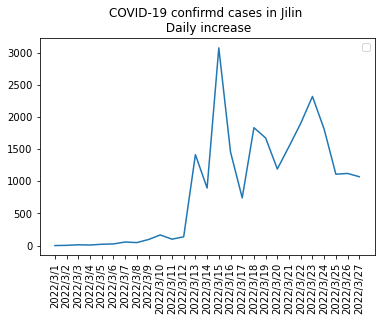

In [ ]:
#TODO
df_j = df_c[df_c["provinceName"] == "吉林省"].copy(deep='True')
# group7 = df_j.groupby("Date")
# # print(list(group7))
# group8 = group7.agg({"city_confirmedCount":"sum"})
# # group8 = group7.apply(lambda x: x.iloc[0]["province_confirmedCount"])
# group9 = group8.diff()
jilin_data = {}

def f1(x):
    jilin_data[list(x['Date'].values)[0]] = \
        list(x['province_confirmedCount'].values)[0]
    return

cnt_res = df_j.groupby('Date').apply(f1)
jilin_s = pd.Series(jilin_data)
jilin_s = jilin_s.sort_index(key=lambda x: np.argsort(index_natsorted(jilin_s.index)))
jilin_s = jilin_s.diff()
jilin_s[0] = 0
import matplotlib.pyplot as plt

plt.title('COVID-19 confirmd cases in Jilin \n Daily increase')  
# plt.title('')  
x = [str(i).split(' ')[0] for i in jilin_s.index]
plt.plot(x,jilin_s)
plt.xticks(rotation=90)
plt.legend(loc=0)      

2.8 请绘制3月以来上海市每日新增的疫情曲线，在一张图上同时画出总新增与本土新增（cityName中有境外输入条目，可以作为区分）(1')。

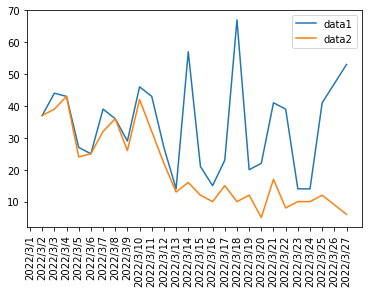

In [ ]:
#TODO
df_c['Date'] = pd.to_datetime(df_c['Date'])
df_s = df_c[df_c["provinceName"] == "上海市"].copy(deep='True')
df_sw = df_s[df_s["cityName"] == "境外输入"].copy(deep='True')

group10 = df_s.groupby("Date")
group12 = df_sw.groupby("Date")
# print(list(group7))
group11 = group10.agg({"city_confirmedCount":"sum"})
# print(list(group12))
group13 = group12.apply(lambda x: x["city_confirmedCount"])
# print(list(group13))
group14 = group11.diff()
group15 = group13.diff()
x1 = x[:]
plt.xticks(rotation=90)
plt.plot(x1,group14.values[:],label='data1')
plt.plot(x1,group15.values[:],label='data2')
plt.legend()
plt.show()

### 附加题 聚类方法比较及评价 (+2')
本题我们利用Minst数据集进行KMeans聚类方法的测试，并对聚类的效果进行评估。

In [ ]:
from sklearn import datasets, preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, MeanShift
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
X = pd.read_csv('./train_X.csv') # 为了方便起见，这里只采用前6000个MNIST数据
y = pd.read_csv('./train_y.csv')
X, y = np.array(X), np.array(y)
print(X.shape)
print(y.shape)

(6000, 784)
(6000, 1)


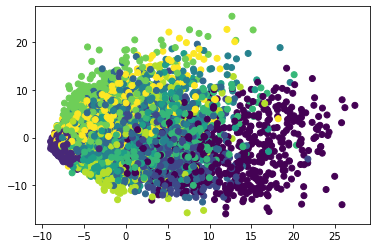

In [ ]:
pca2d = PCA(n_components=2)
X_std = preprocessing.scale(X) # 数据标准化
X_2d = pca2d.fit_transform(X_std)# 数据降维至两维便于可视化
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y)

3.1 请在原始的标准化数据X_std和降至二维的数据X_2d上分别进行KMeans聚类，并对两种聚类结果进行可视化（以标签作为颜色，均只在二维可视化即可）和纯度计算（参考PPT第四页的公式）。+1'

C:\Users\ghr_p\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\ghr_p\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


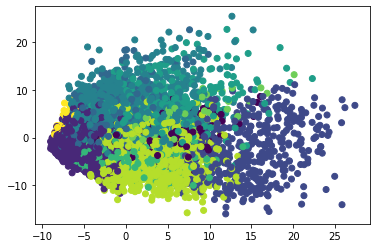

In [ ]:
#TODO
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y))
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
kmeans.fit(X_std)
label_std = kmeans.labels_
kmeans2 = MiniBatchKMeans(n_clusters = total_clusters)
kmeans2.fit(X_2d)
label_2d = kmeans2.labels_
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=label_std)

# init_centers_index = np.random.randint(img.shape[0]*img.shape[1], size=10)

Purity1:  0.4845000000000001
Purity2:  0.334


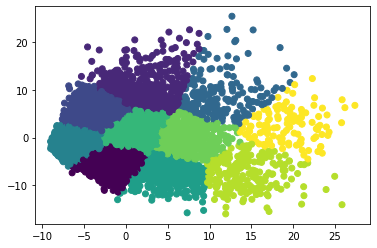

In [ ]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=label_2d)

# 纯度1
pi_std = np.zeros((10,10))
nr = np.zeros((10,))
ni = np.zeros((10,))
for i in range(10):
    for j in range(10):
        pi_std[i][j] = ((y.T == i)&(label_std == j)).sum()
    nr[i] = (label_std == i).sum()
    ni[i] = (y.T == i).sum()
# p_std =
# print(pi_std)
pi_std_ = pi_std.max(0)
# print(pi_std)
p_sr = pi_std_/nr
p_sr
P = p_sr*nr/y.shape[0]
P = P.sum()
print("Purity1: ",P)

# 纯度1
pi_2d = np.zeros((10,10))
nr_2d = np.zeros((10,))
for i in range(10):
    for j in range(10):
        pi_2d[i][j] = ((y.T == i)&(label_2d == j)).sum()
    nr_2d[i] = (label_2d == i).sum()
# p_std =
# print(pi_std)
pi_2d_ = pi_2d.max(0)
# print(pi_std)
p_sr_2d = pi_2d_/nr_2d
p_sr_2d
P_2d = p_sr_2d*nr_2d/y.shape[0]
P_2d = P_2d.sum()
print("Purity2: ",P_2d)


3.2 请用KM算法等方式实现聚类结果和原标签的最优匹配，并在此基础上计算两种结果的F值。+1'

参考阅读：

1. 匈牙利算法Wiki https://zh.wikipedia.org/wiki/%E5%8C%88%E7%89%99%E5%88%A9%E7%AE%97%E6%B3%95 
2. KM算法讲解 https://blog.csdn.net/sixdaycoder/article/details/47720471
3. KM算法python实现https://blog.csdn.net/weixin_39504758/article/details/120183504


In [ ]:
#TODO
import itertools
import numpy as np
from numpy import random
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import f1_score

res_std=MiniBatchKMeans(n_clusters=10).fit(X_std)
res_2d = MiniBatchKMeans(n_clusters=10).fit(X_2d)
label_2d = res_2d.labels_

def hungary(task_matrix):
    b = task_matrix.copy()
    for i in range(len(b)):
        row_min = np.min(b[i])
        for j in range(len(b[i])):
            b[i][j] -= row_min
    for i in range(len(b[0])):
        col_min = np.min(b[:, i])
        for j in range(len(b)):
            b[j][i] -= col_min
    line_count = 0
    while (line_count < len(b)):
        line_count = 0
        row_zero_count = []
        col_zero_count = []
        for i in range(len(b)):
            row_zero_count.append(np.sum(b[i] == 0))
        for i in range(len(b[0])):
            col_zero_count.append((np.sum(b[:, i] == 0)))
        line_order = []
        row_or_col = []
        for i in range(len(b[0]), 0, -1):
            while (i in row_zero_count):
                line_order.append(row_zero_count.index(i))
                row_or_col.append(0)
                row_zero_count[row_zero_count.index(i)] = 0
            while (i in col_zero_count):
                line_order.append(col_zero_count.index(i))
                row_or_col.append(1)
                col_zero_count[col_zero_count.index(i)] = 0
        delete_count_of_row = []
        delete_count_of_rol = []
        row_and_col = [i for i in range(len(b))]
        for i in range(len(line_order)):
            if row_or_col[i] == 0:
                delete_count_of_row.append(line_order[i])
            else:
                delete_count_of_rol.append(line_order[i])
            c = np.delete(b, delete_count_of_row, axis=0)
            c = np.delete(c, delete_count_of_rol, axis=1)
            line_count = len(delete_count_of_row) + len(delete_count_of_rol)
            # 线数目等于矩阵长度时，跳出
            if line_count == len(b):
                break
            # 判断是否画线覆盖所有0，若覆盖，进行加减操作
            if 0 not in c:
                row_sub = list(set(row_and_col) - set(delete_count_of_row))
                min_value = np.min(c)
                for i in row_sub:
                    b[i] = b[i] - min_value
                for i in delete_count_of_rol:
                    b[:, i] = b[:, i] + min_value
                break
    row_ind, col_ind = linear_sum_assignment(b)
    return row_ind,col_ind

def get_task_matrix(pred,gold):
    assert pred.shape[0]==gold.shape[0]
    pred_labels,pred_cnt=np.unique(pred,return_counts=True)
    gold_labels,gold_cnt=np.unique(gold,return_counts=True)

    l_p=len(pred_labels)
    l_g=len(gold_labels)

    task_matrix=np.zeros((l_p,l_g))
    for i in range(l_p):
        i_gold=gold[pred==pred_labels[i]]
        for j in i_gold:
            task_matrix[i][j]-=1

    return task_matrix

def cal_f(pred,gold,row_ind,col_ind):
    assert len(row_ind)==len(col_ind)
    l=len(row_ind)

    t_p=np.zeros_like(pred)

    for i in range(l):
       t_p[pred==row_ind[i]]=col_ind[i]


    macro_f1=f1_score(gold,t_p,average='macro')

    return macro_f1

tm_std = get_task_matrix(res_std.labels_,y)
row_ind,col_ind=hungary(tm_std)
print("F1: ",  cal_f(res_std.labels_,y,row_ind,col_ind))

tm_2d = get_task_matrix(res_2d.labels_,y)
row_ind,col_ind=hungary(tm_2d)
print("F2: ", cal_f(res_2d.labels_,y,row_ind,col_ind))

C:\Users\ghr_p\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\ghr_p\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 4096 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


F1:  0.337631242967494
F2:  0.2533137937544657
